## Imports, dados e DataFrames

In [1]:
# imports, dados e dataframes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'
pais = 'https://balanca.economia.gov.br/balanca/bd/tabelas/PAIS.csv'

df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")
df_pais = pd.read_csv(pais, sep=";", encoding="latin1")


## Top 10 municípios por total de exportações em Kg por ano

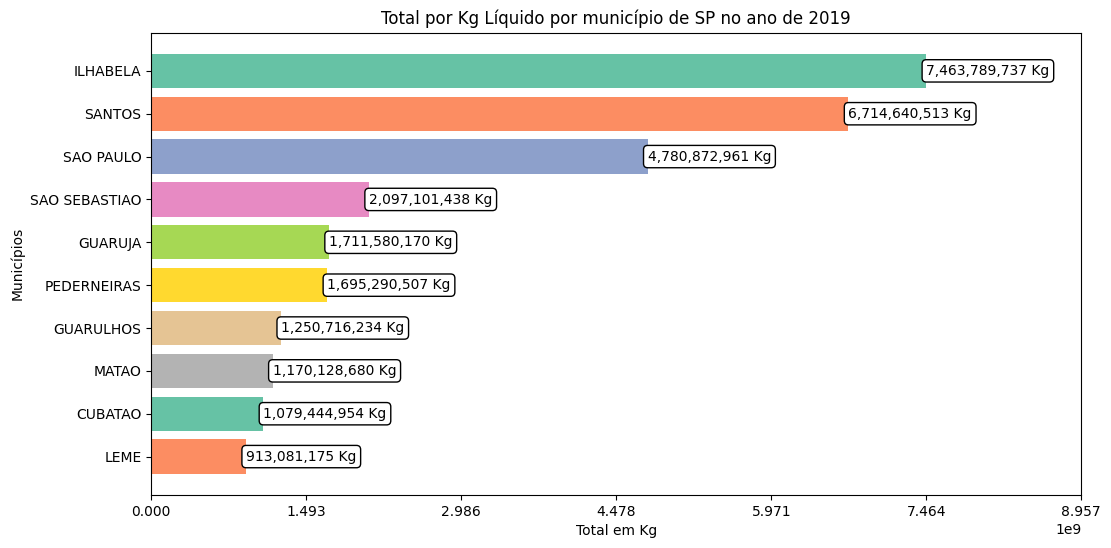

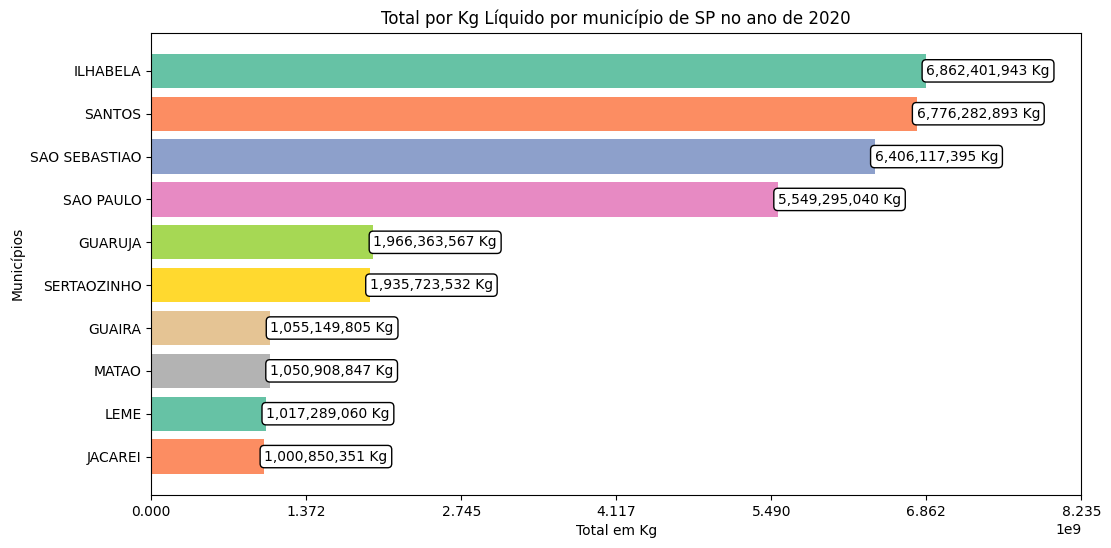

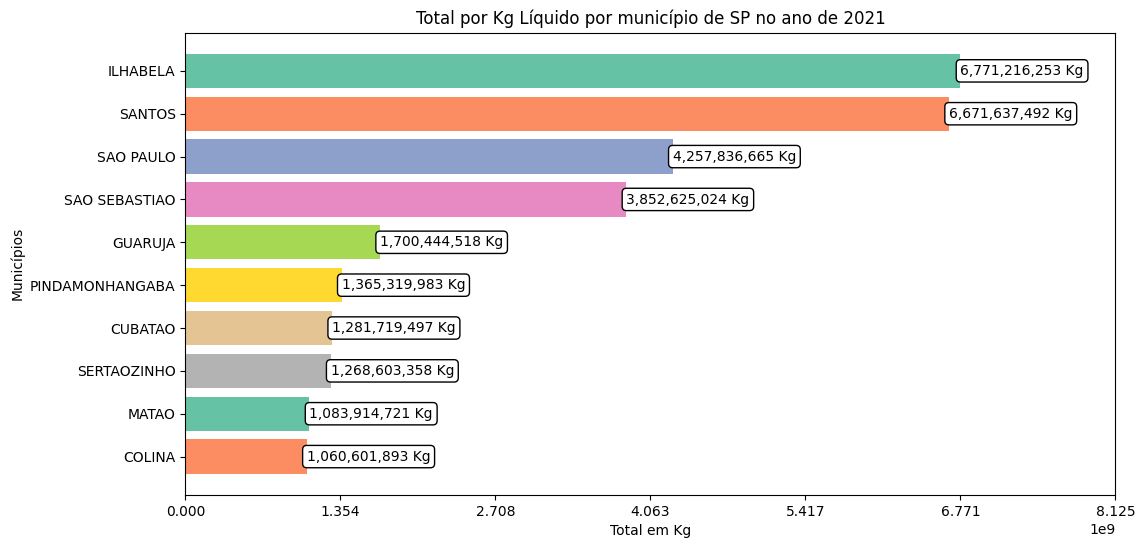

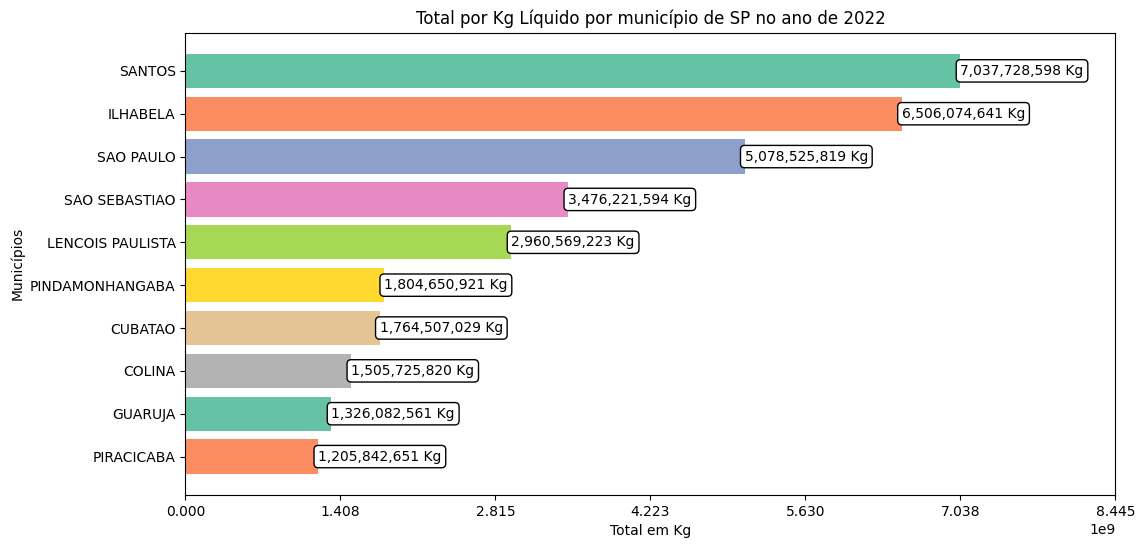

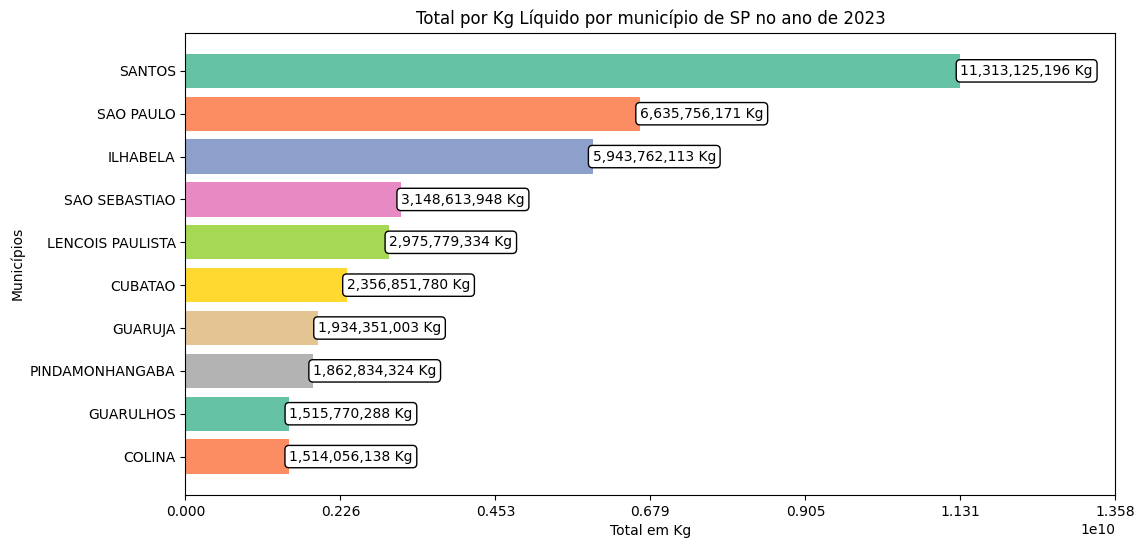

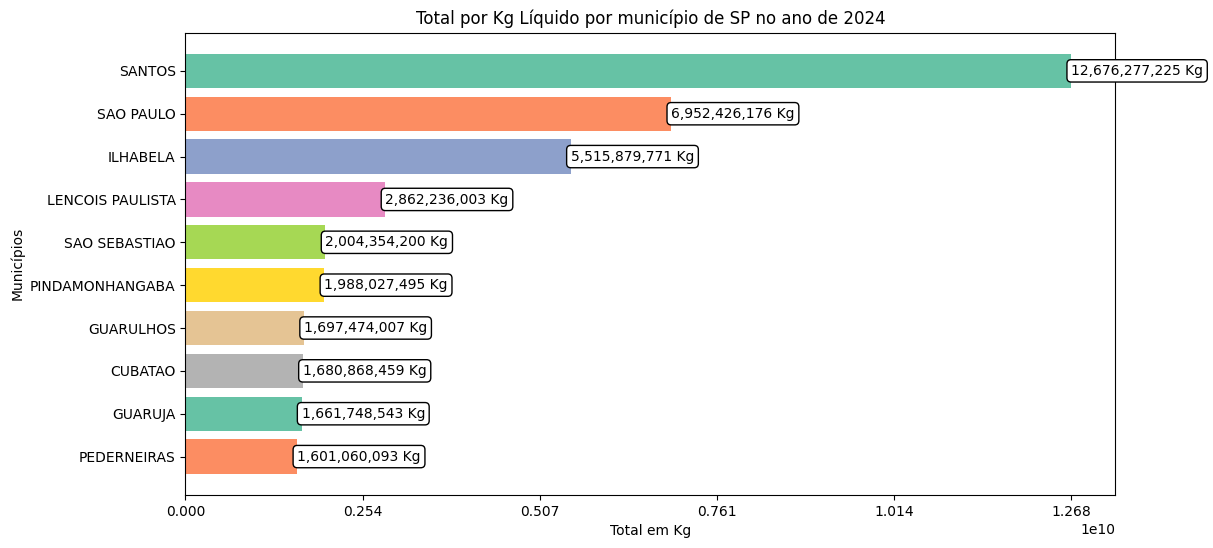

In [2]:
for year in range(2019,2025):
    url = f'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_{year}_MUN.csv'
    df = pd.read_csv(url, sep=";", encoding="latin1")

    # Apenas o estado de SP
    df_mun_sp = df[df["SG_UF_MUN"] == "SP"]

    # Soma do total de KG_LIQUIDO opr município
    kg_total_por_mun = df_mun_sp.groupby("CO_MUN")["KG_LIQUIDO"].sum().reset_index()

    # Renomear coluna para compatibilidade com a base de municípios
    df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

    # Mesclar com a tabela de Mun para pegar os nomes
    kg_total_por_mun = kg_total_por_mun.merge(df_mun, on="CO_MUN", how="left")

    # 10 municípios por peso em exportações
    mun_top10 = kg_total_por_mun.sort_values(by="KG_LIQUIDO", ascending=False).head(10)


    # Usando uma paleta de cores do seaborn (pode ser qualquer uma das paletas, como 'Set1', 'tab10', etc.)
    colors = sns.color_palette("Set2", n_colors=len(mun_top10))

    # Criar gráfico de barras com cores variadas
    plt.figure(figsize=(12, 6))
    bars = plt.barh(mun_top10["NO_MUN"], mun_top10["KG_LIQUIDO"], color=colors)

    # Adicionar uma caixa de texto com o valor total de Kg no meio de cada barra
    for bar in bars:
        width = bar.get_width()  # O valor da barra no eixo X
        y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
        plt.text(width, y_position, f'{width:,.0f} Kg', va='center', ha='left', color='black', fontsize=10,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Ajustar o eixo X dinamicamente
    max_kg = int(mun_top10["KG_LIQUIDO"].max())
    step = max_kg // 5  # Define o intervalo de 5 passos no eixo X
    plt.xticks(range(0, max_kg + step, step))

    # Adicionar rótulos e título
    plt.xlabel("Total em Kg")
    plt.ylabel("Municípios")
    plt.title(f"Total por Kg Líquido por município de SP no ano de {year}")

    # Inverter a ordem do eixo Y para mostrar o maior valor no topo
    plt.gca().invert_yaxis()


## Top 10 municípios por quantidade de exportações por ano

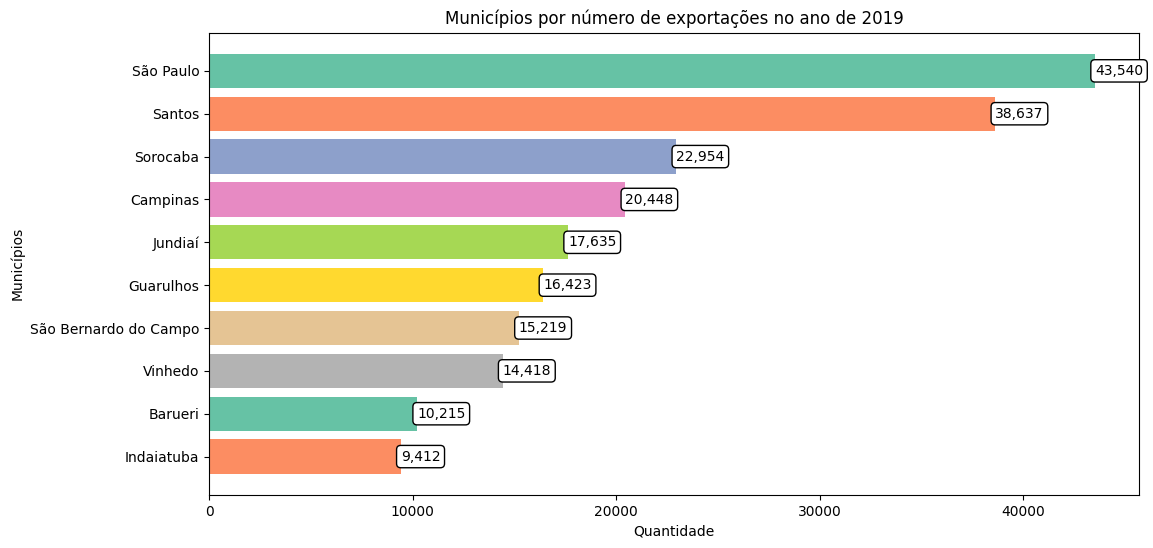

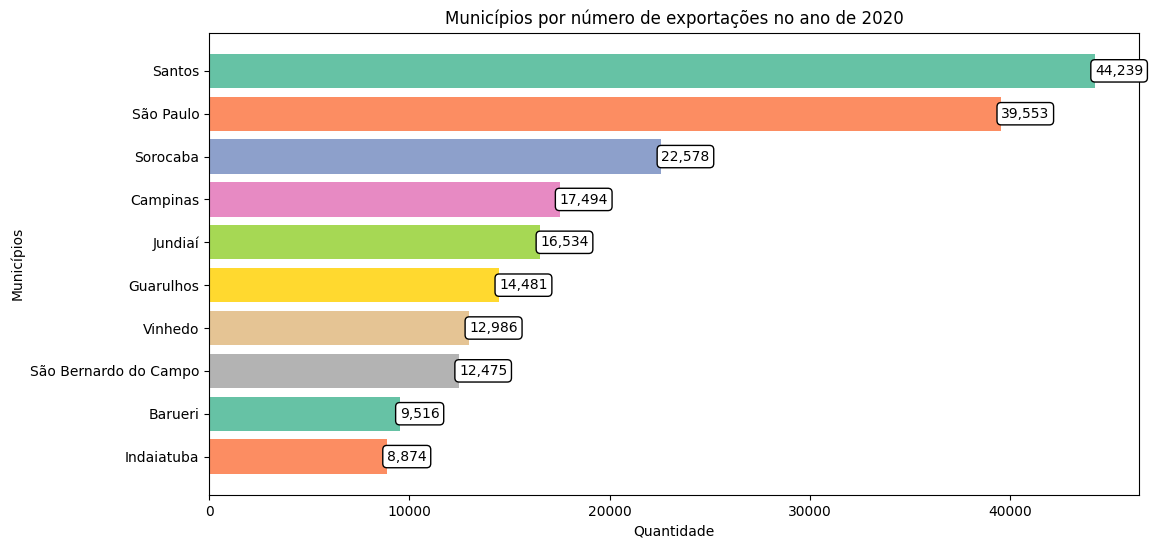

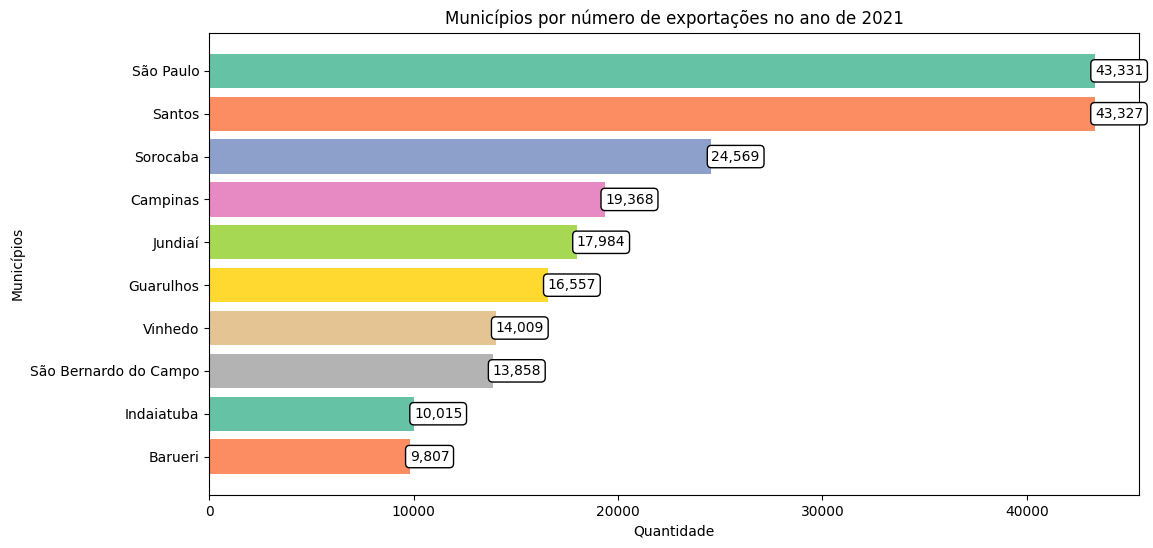

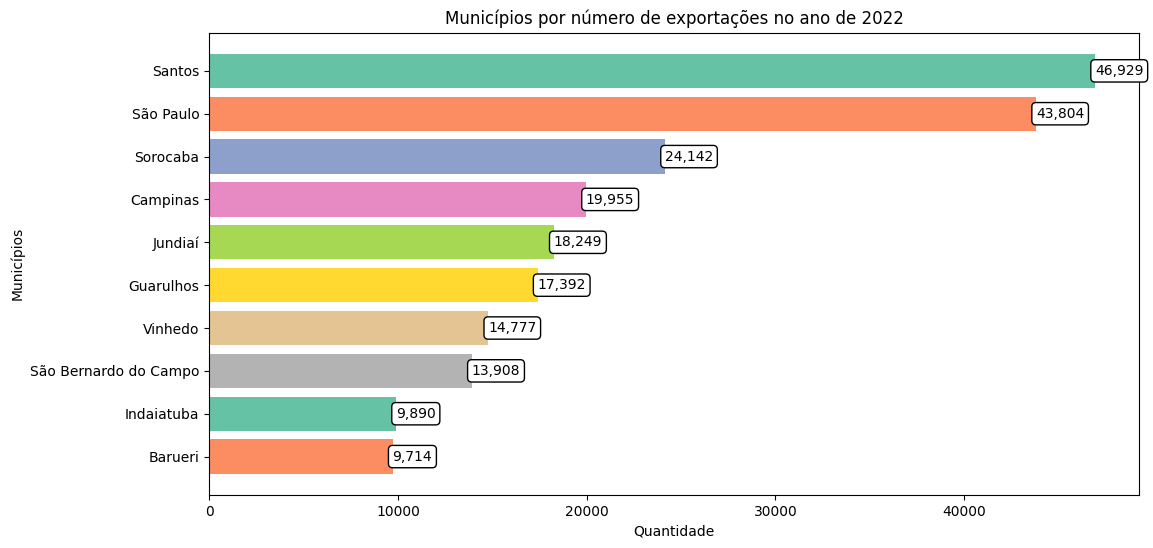

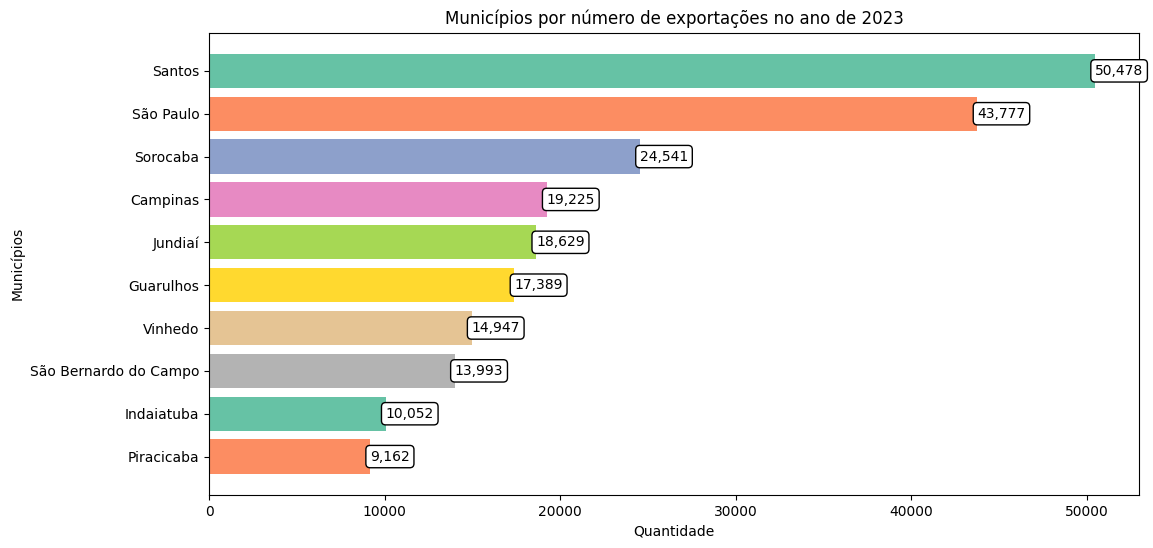

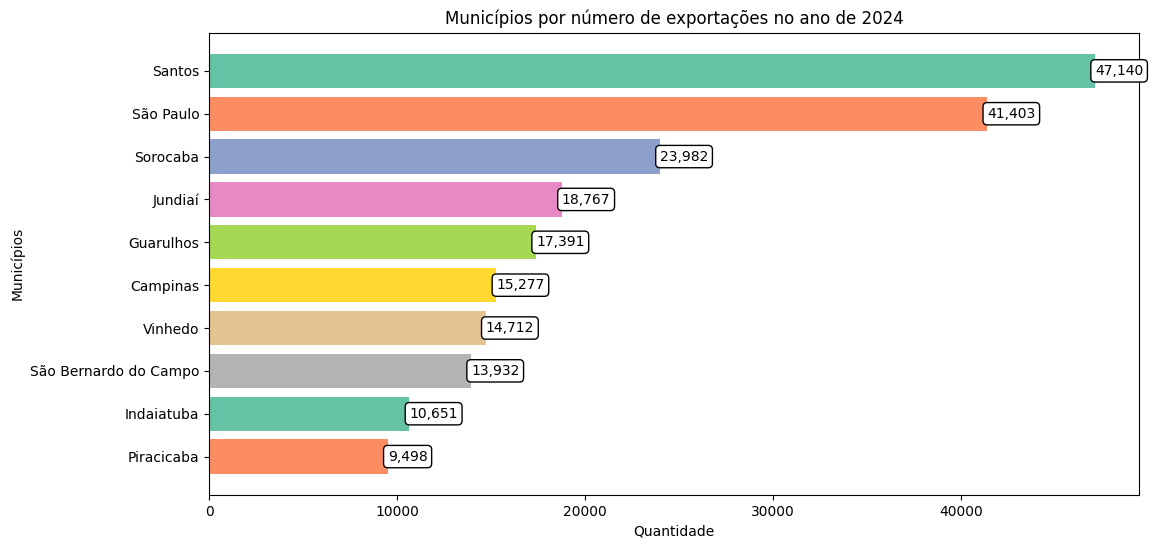

In [ ]:
for year in range (2019, 2025):
    url = f'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_{year}_MUN.csv'
    df = pd.read_csv(url, sep=";", encoding="latin1")

    # Apenas o estado de SP // MESCLAR COM A TABELA DE MUN PARA PEGAR OS NOMES
    df_mun_sp = df[df["SG_UF_MUN"] == "SP"]

    # Renomear para ser compatível com a base de municípios
    df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

    # Contagem de exportações
    mun_quant = df_mun_sp["CO_MUN"].value_counts().rename_axis("CO_MUN").reset_index(name="QUANTIDADE")
    mun_quant_top10 = mun_quant.head(10)

    # Pegar os nomes da tabela de municípios
    mun_quant_top10 = mun_quant_top10.merge(df_mun, on="CO_MUN", how="left")

    # Usando uma paleta de cores do seaborn (pode ser qualquer uma das paletas, como 'Set1', 'tab10', etc.)
    colors = sns.color_palette("Set2", n_colors=len(mun_quant_top10))

    # Gráfico de barras
    plt.figure(figsize=(12, 6))
    bars = plt.barh(mun_quant_top10["NO_MUN_MIN"], mun_quant_top10["QUANTIDADE"], color=colors)

    # Adicionar uma caixa de texto com a quantidade no meio de cada barra
    for bar in bars:
        width = bar.get_width()  # O valor da barra no eixo X (número de exportações)
        y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
        plt.text(width, y_position, f'{width:,.0f}', va='center', ha='left', color='black', fontsize=10,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Adicionar rótulos e título
    plt.xlabel("Quantidade")
    plt.ylabel("Municípios")
    plt.title(f"Municípios por número de exportações no ano de {year}")

    # Inverter a ordem do eixo Y para mostrar o maior valor no topo
    plt.gca().invert_yaxis()

    # Exibir o gráfico
    plt.show()

## Top 10 produtos exportados por ano no estado de SP

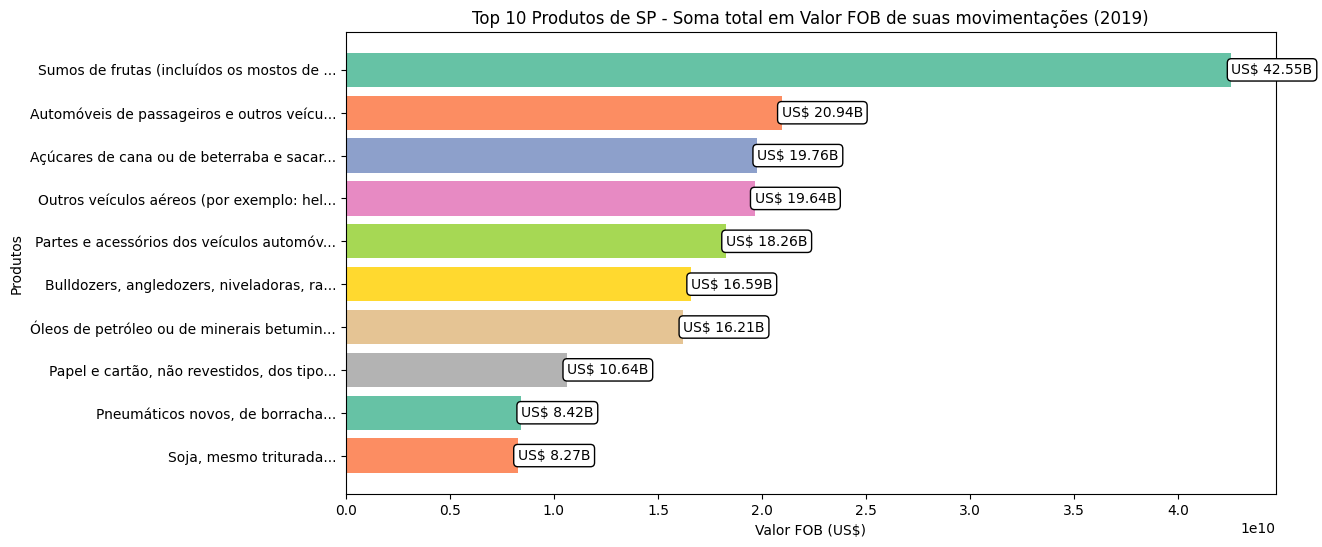

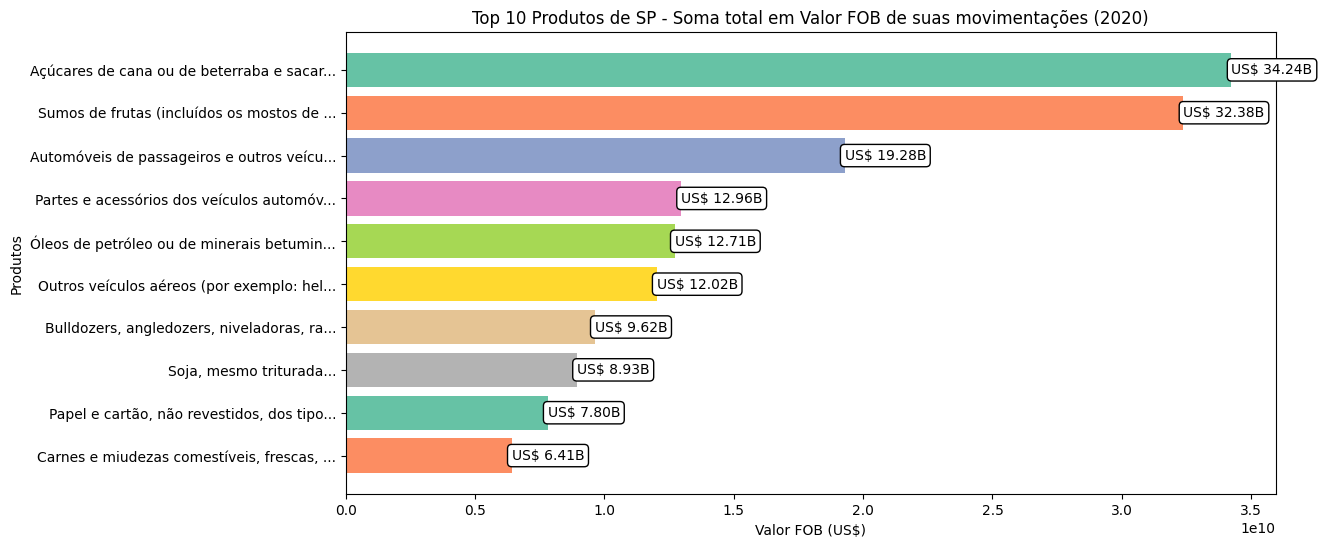

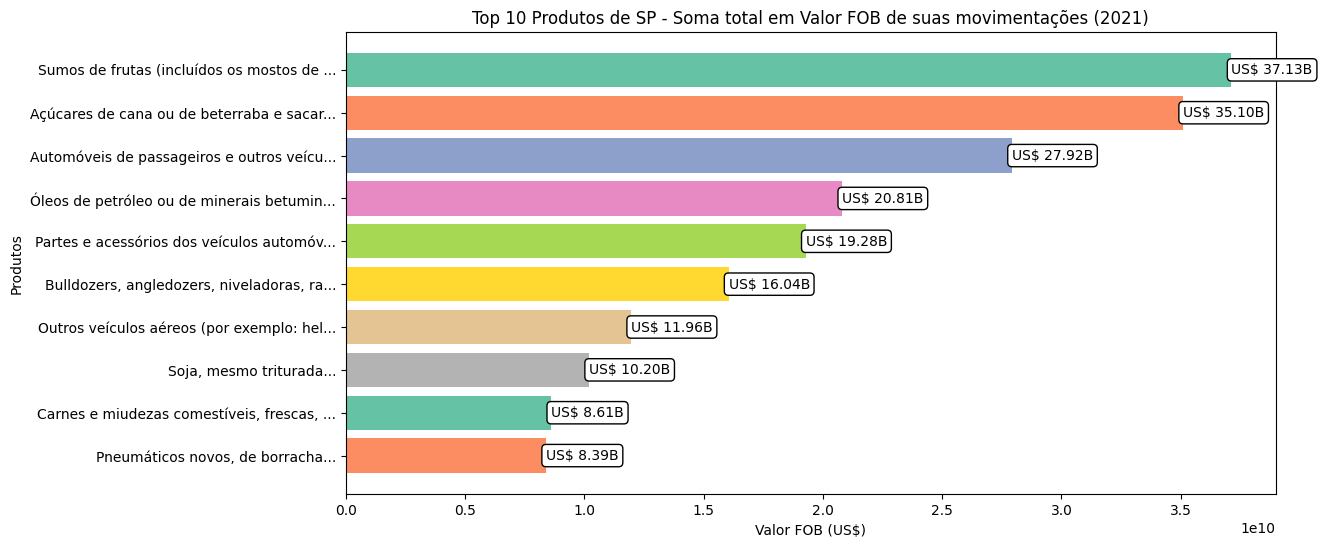

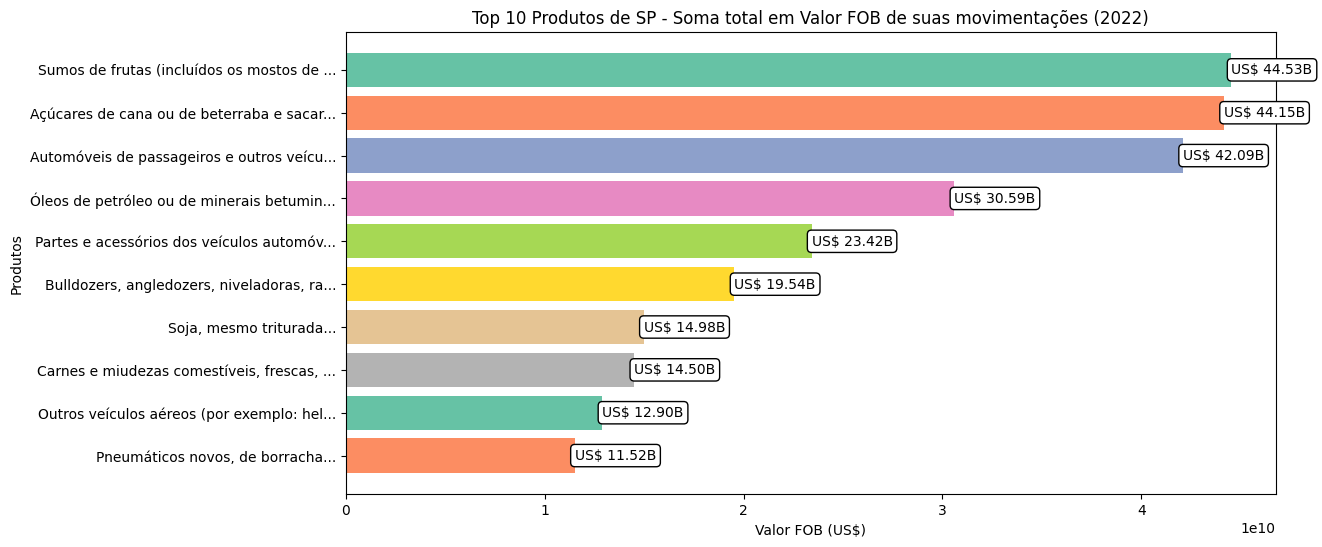

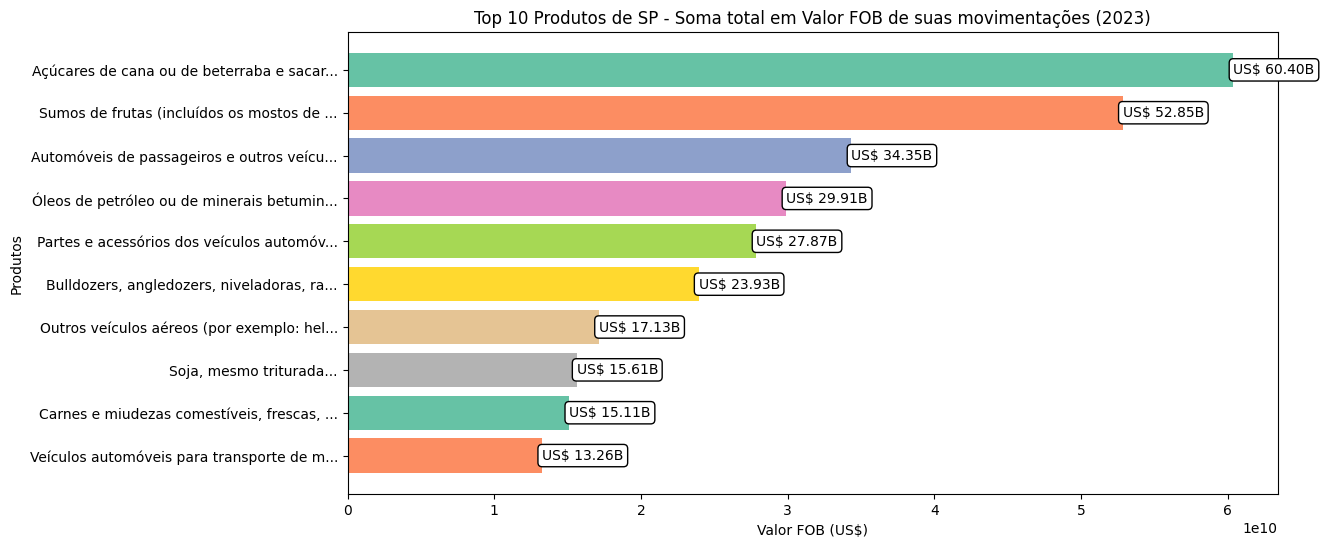

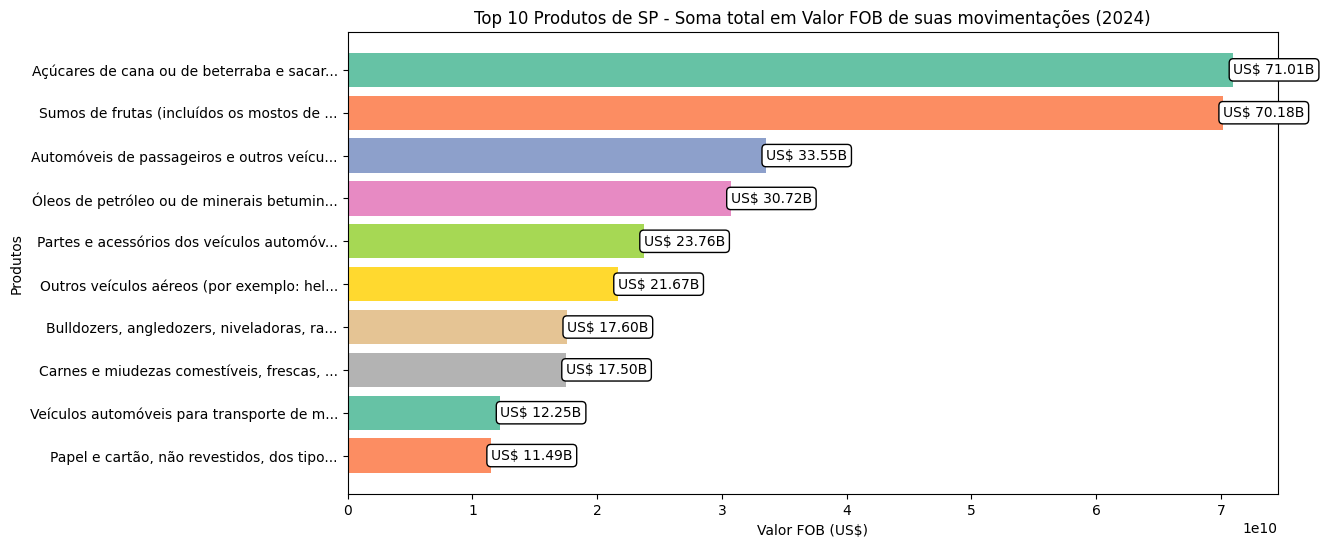

In [3]:
for year in range(2019, 2025):
    url = url = f'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_{year}_MUN.csv'
    df = pd.read_csv(url, sep=";", encoding="latin1")

    #vendo se tem campo vazio
    df.isna().sum()
    df_mun.isna().sum()
    df_sh4.isna().sum()

    #vendo se tem campo duplicado
    df.loc[df.duplicated()]
    df_mun.loc[df_mun.duplicated()]
    df_sh4.loc[df_sh4.duplicated()]

    # Filtrar dados para o estado de São Paulo (SP)
    df = df[df["SG_UF_MUN"] == "SP"]

    # Calcular valor agregado (VL_FOB / KG_LIQUIDO)
    df["VALOR_AGREGADO"] = df["VL_FOB"] / df["KG_LIQUIDO"]

    # Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
    df = df[df["KG_LIQUIDO"] > 0]

    # Renomear coluna para compatibilidade com a base de municípios
    df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

    # Mesclar com os nomes dos municípios
    df = df.merge(df_mun, on=["CO_MUN"], how="left")

    # Remover a coluna 'SG_UF' pois existe a 'SG_UF_MUN':
    df = df.drop('SG_UF', axis=1)

    # Renomear coluna para compatibilidade com a base de produtos
    df_sh4 = df_sh4.rename(columns={"CO_SH4": "SH4", "NO_SH4_POR": "PRODUTO"})

    # Mesclar com os nomes dos produtos
    df = df.merge(df_sh4, on=["SH4"], how="left")

    # Remover as colunas que não sejam o SH4 e o Produto:
    df = df.drop( ['CO_SH6', 'NO_SH6_POR', 'NO_SH6_ESP', 'NO_SH6_ING','NO_SH4_ESP', 'NO_SH4_ING', 'CO_SH2', 'NO_SH2_POR', 'NO_SH2_ESP', 'NO_SH2_ING', 'CO_NCM_SECROM', 'NO_SEC_POR', 'NO_SEC_ESP','NO_SEC_ING'], axis=1)

    # Extraindo agrupamento a soma da coluna Valor FOB e suas respectivas cargas
    cargas_valor_fob = df.groupby(['SG_UF_MUN','SH4','PRODUTO'])['VL_FOB'].sum().reset_index()

    # Ordenando pela soma do valor FOB de forma decrescente e pegando os 10 primeiros
    top10_cargas_valor_fob = cargas_valor_fob.sort_values(by='VL_FOB', ascending=False).head(10).reset_index(drop=True)

    # --- Diminuindo o texto dos produtos em 40 caracteres ---
    top10_cargas_valor_fob['PRODUTO_TRUNCADO'] = top10_cargas_valor_fob['PRODUTO'].apply(lambda x: x[:40] + '...' if len(x) > 20 else x)

    # --- Gráfico dos 10 produtos com maior valor fob somado ---
    # Usando uma paleta de cores do seaborn (pode ser qualquer uma das paletas, como 'Set1', 'tab10', etc.)
    paleta_de_cores = sns.color_palette("Set2", n_colors=len(top10_cargas_valor_fob))

    # Criar gráfico de barras com cores variadas
    plt.figure(figsize=(12, 6))
    bars_produtos = plt.barh(top10_cargas_valor_fob['PRODUTO_TRUNCADO'], top10_cargas_valor_fob['VL_FOB'], color=paleta_de_cores)

    # Adicionar uma caixa de texto com o valor us no meio de cada barra
    for bar in bars_produtos:
        width = bar.get_width()  # O valor da barra no eixo X
        y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y

        # Verificar se o valor é maior que 1 milhão (1e6) ou 1 bilhão (1e9)
        if width >= 1e9:
            # Exibir em bilhões (B)
            label = f'US$ {width / 1e9:.2f}B'
        elif width >= 1e6:
            # Exibir em milhões (M)
            label = f'US$ {width / 1e6:.2f}M'
        else:
            # Exibir o valor original, se menor que 1 milhão
            label = f'US$ {width:.2f}'

        # Adicionar o texto no gráfico
        plt.text(width, y_position, label, va='center', ha='left', color='black', fontsize=10,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Adicionar rótulos e título
    plt.xlabel("Valor FOB (US$)")
    plt.ylabel("Produtos")
    plt.title(f"Top 10 Produtos de SP - Soma total em Valor FOB de suas movimentações ({year})")

    # Inverter a ordem do eixo Y para mostrar o maior valor no topo
    plt.gca().invert_yaxis()


## Top 10 municípios por Valor Agregado de exportações

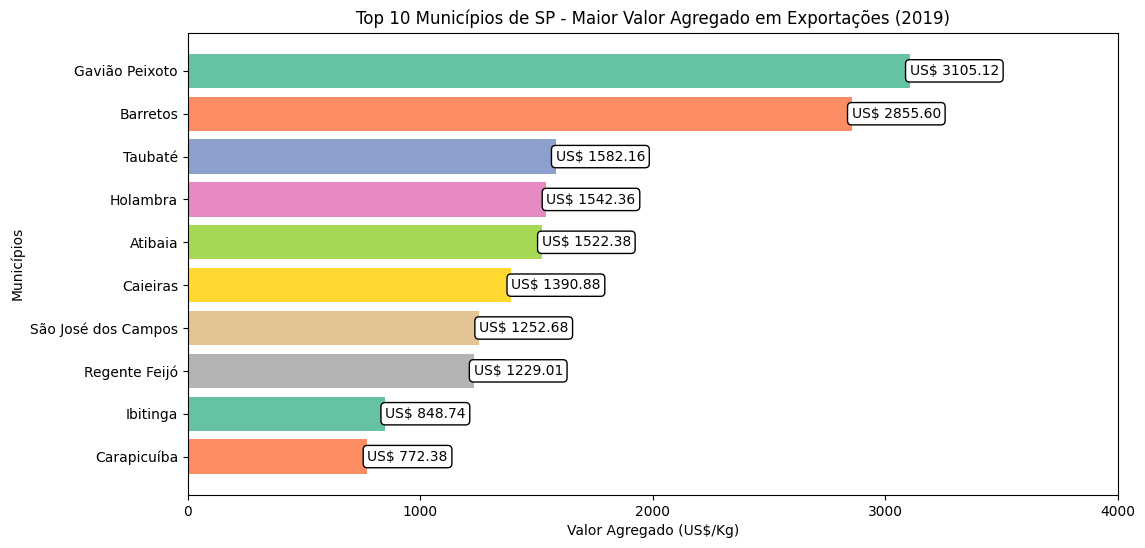

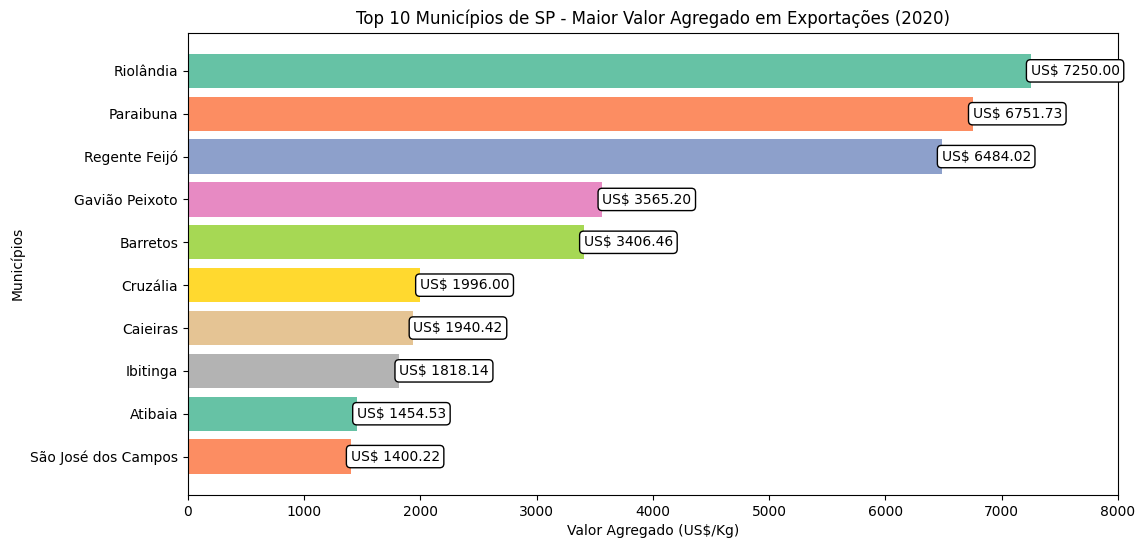

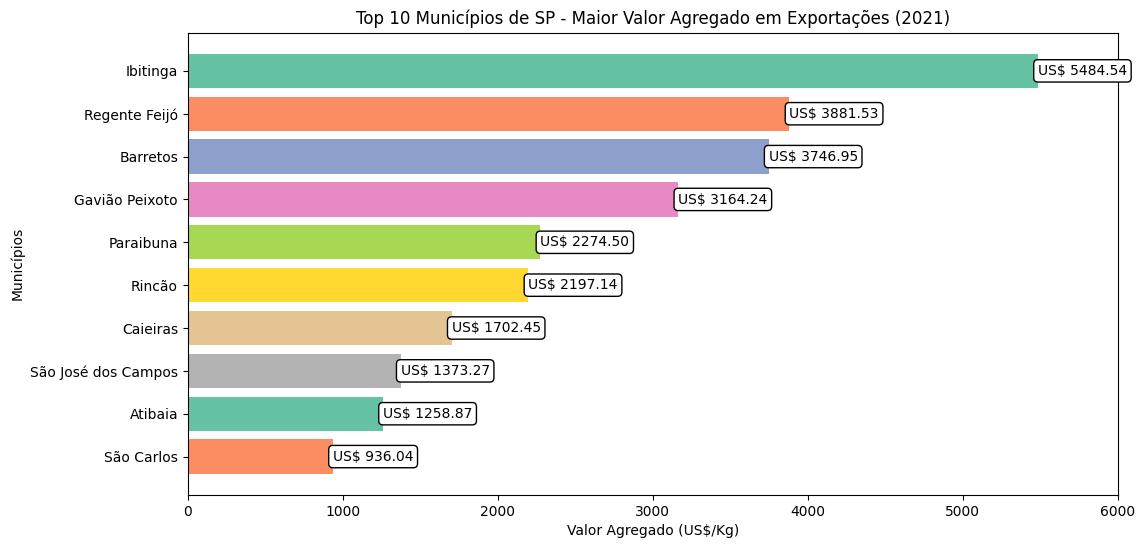

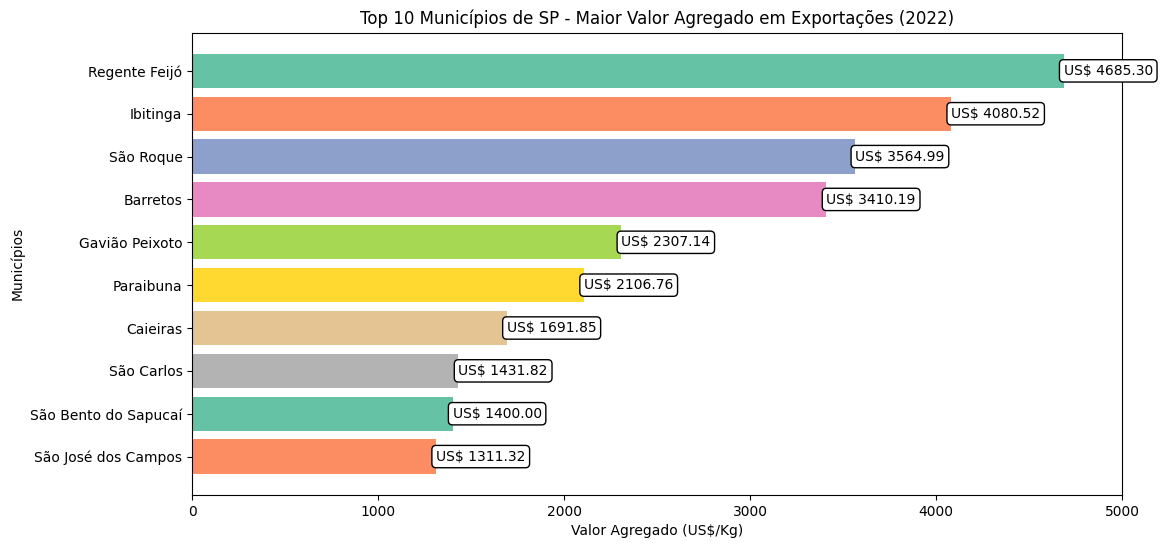

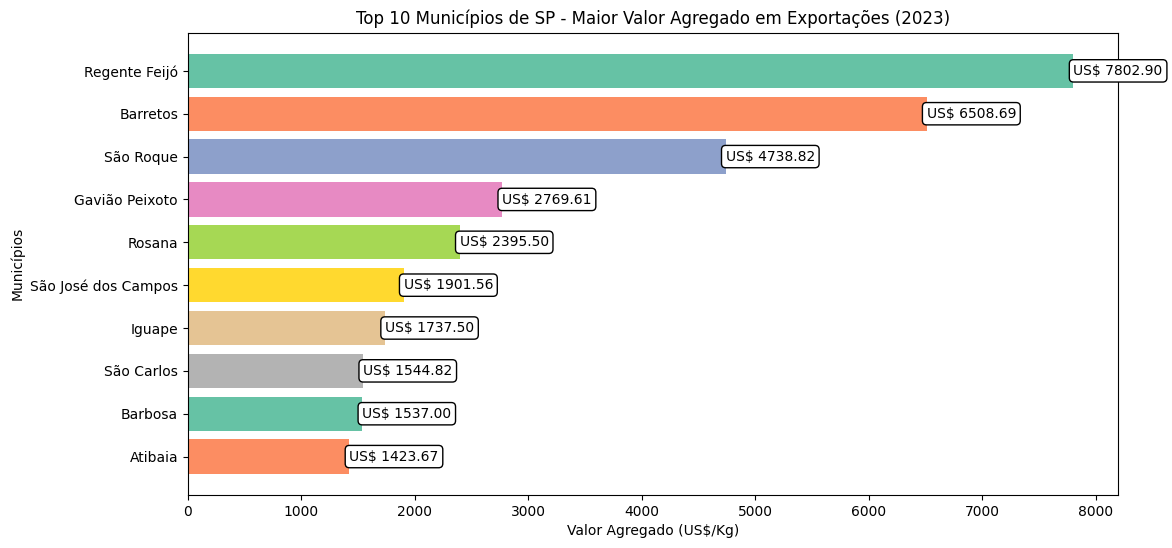

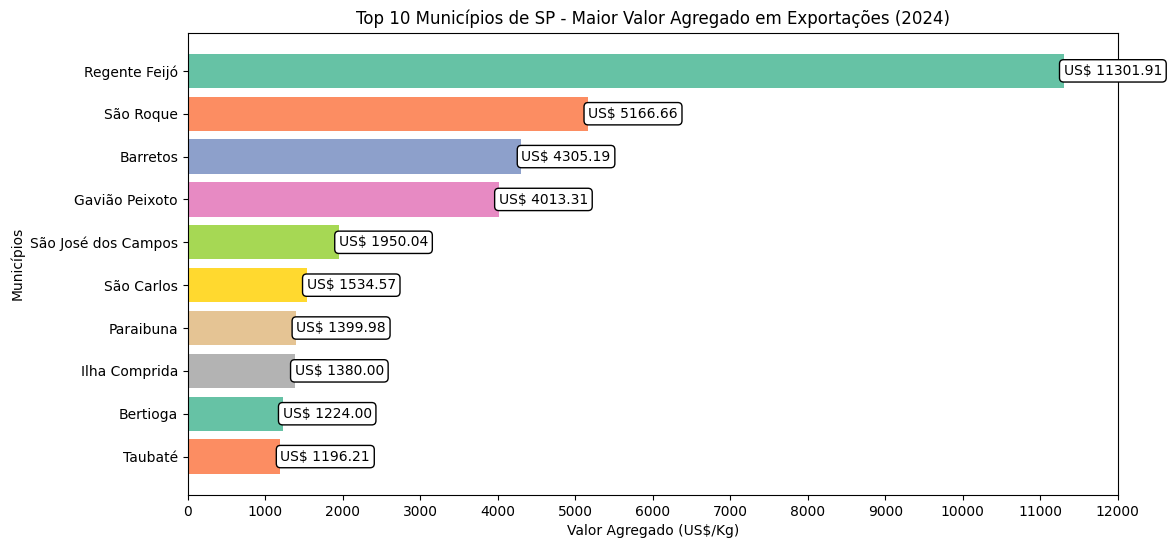

In [ ]:
for year in range(2019, 2025):
    url = f'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_{year}_MUN.csv'
    df = pd.read_csv(url, sep=";", encoding="latin1")

    # Filtrar dados para o estado de São Paulo (SP)
    df_sp = df[df["SG_UF_MUN"] == "SP"]

    # Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
    df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

    # Calcular valor agregado (VL_FOB / KG_LIQUIDO)
    df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

    # Agrupar por município e calcular a média do valor agregado
    municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

    # Renomear coluna para compatibilidade com a base de municípios
    df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

    # Mesclar com os nomes dos municípios
    municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

    # Selecionar as 10 cidades com maior valor agregado
    municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

    # Usando uma paleta de cores do seaborn (pode ser qualquer uma das paletas, como 'Set1', 'tab10', etc.)
    paleta_de_cores = sns.color_palette("Set2", n_colors=len(municipios_top10))

    # Criar gráfico de barras com cores variadas
    plt.figure(figsize=(12, 6))
    bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

    # Adicionar uma caixa de texto com o valor real no meio de cada barra
    for bar in bars:
        width = bar.get_width()  # O valor da barra no eixo X
        y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
        plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Ajustar o eixo X para aparecer de 1000 em 1000
    plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

    # Adicionar rótulos e título
    plt.xlabel("Valor Agregado (US$/Kg)")
    plt.ylabel("Municípios")
    plt.title(f"Top 10 Municípios de SP - Maior Valor Agregado em Exportações ({year})")

    # Inverter a ordem do eixo Y para mostrar o maior valor no topo
    plt.gca().invert_yaxis()

## Top 10 municípios por Valor Agregado de importações

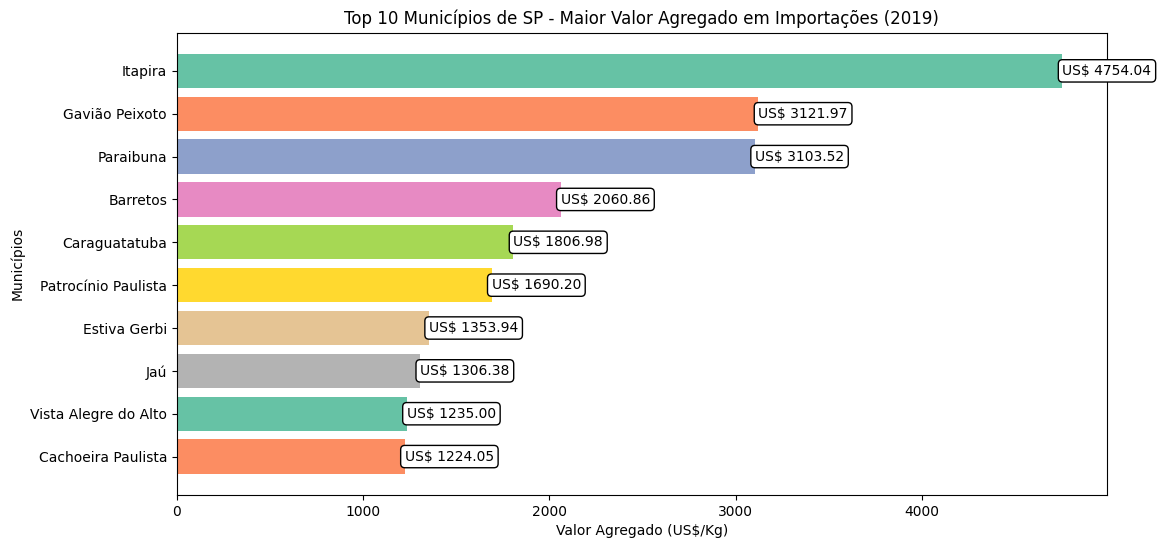

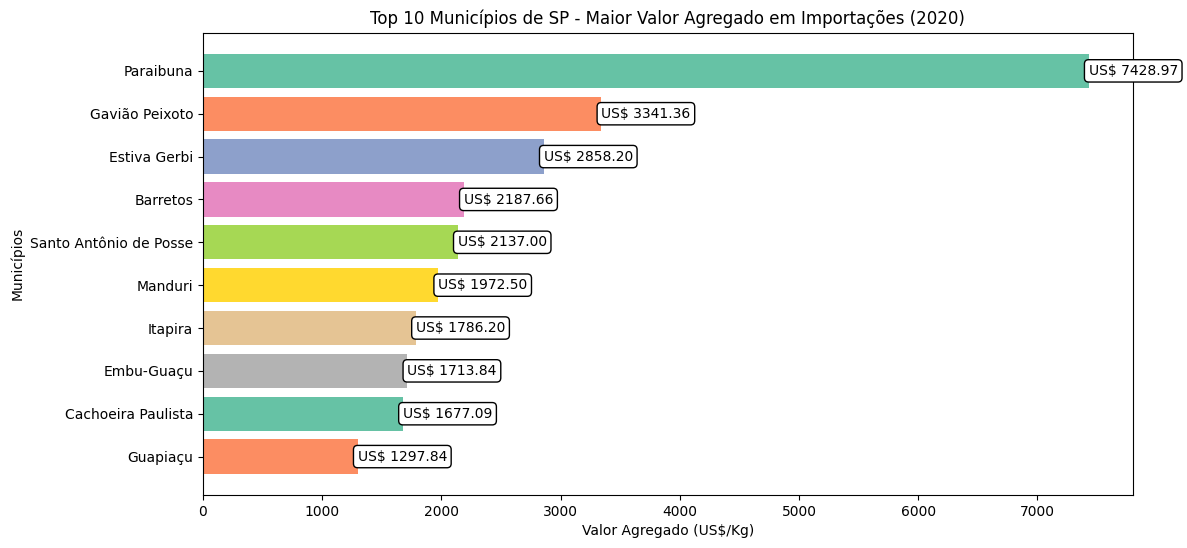

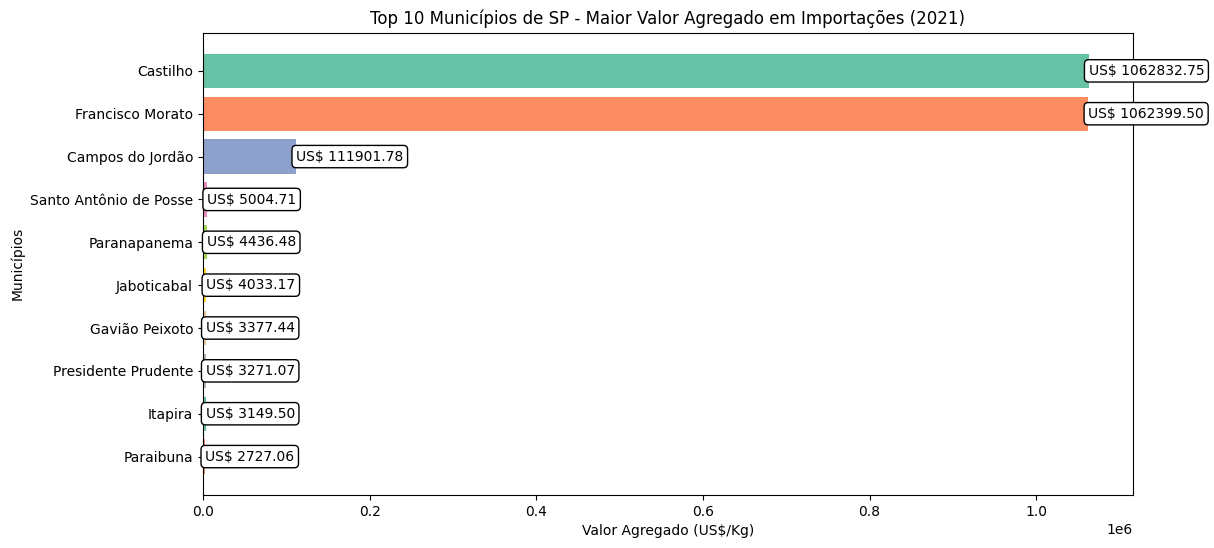

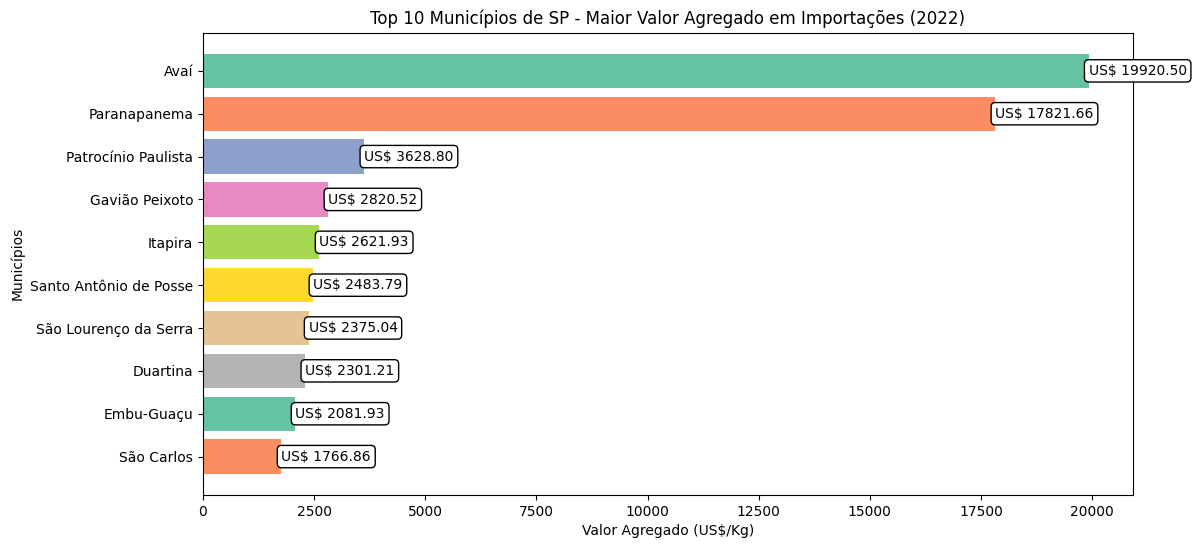

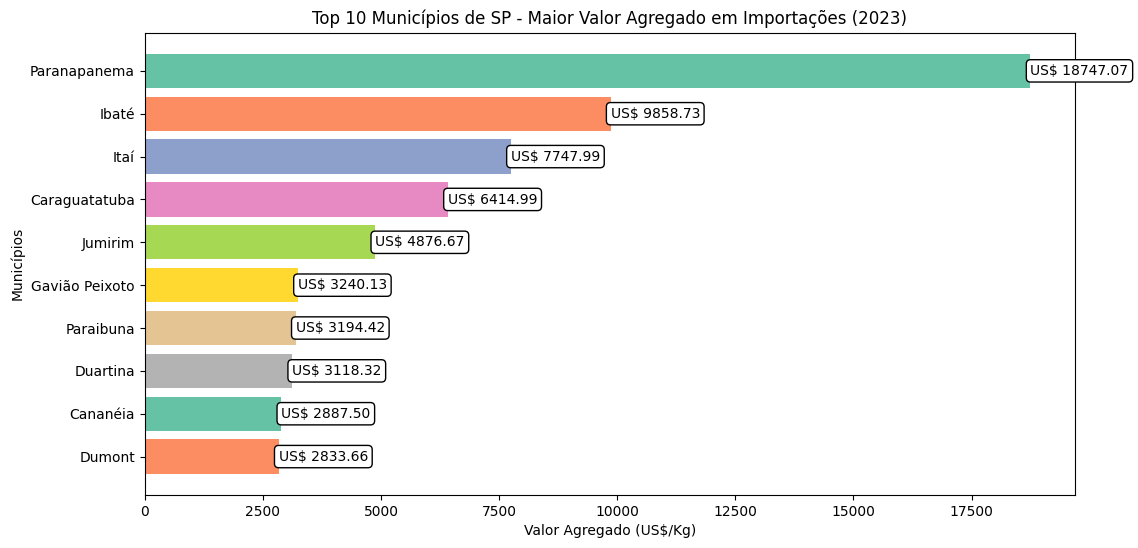

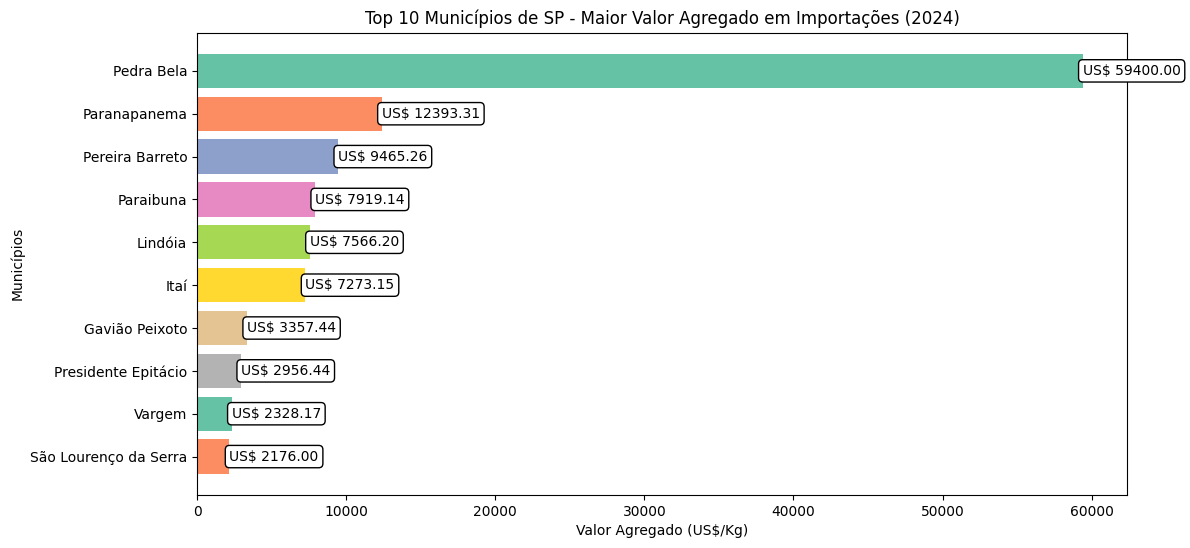

In [ ]:
for year in range(2019, 2025):
    url = f'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/IMP_{year}_MUN.csv'
    df = pd.read_csv(url, sep=";", encoding="latin1")

    # Filtrar dados para o estado de São Paulo (SP)
    df_sp = df[df["SG_UF_MUN"] == "SP"]

    # Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
    df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

    # Calcular valor agregado (VL_FOB / KG_LIQUIDO)
    df_sp["VALOR_AGREGADO"] = df_sp["VL_FOB"] / df_sp["KG_LIQUIDO"]

    # Agrupar por município e calcular a média do valor agregado
    municipios_agregado = df_sp.groupby("CO_MUN")["VALOR_AGREGADO"].mean().reset_index()

    # Renomear coluna para compatibilidade com a base de municípios
    df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

    # Mesclar com os nomes dos municípios
    municipios_agregado = municipios_agregado.merge(df_mun, on="CO_MUN", how="left")

    # Selecionar as 10 cidades com maior valor agregado
    municipios_top10 = municipios_agregado.sort_values(by="VALOR_AGREGADO", ascending=False).head(10)

    # Usando uma paleta de cores do seaborn (pode ser qualquer uma das paletas, como 'Set1', 'tab10', etc.)
    paleta_de_cores = sns.color_palette("Set2", n_colors=len(municipios_top10))

    # Criar gráfico de barras com cores variadas
    plt.figure(figsize=(12, 6))
    bars = plt.barh(municipios_top10["NO_MUN_MIN"], municipios_top10["VALOR_AGREGADO"], color=colors)

    # Adicionar uma caixa de texto com o valor real no meio de cada barra
    for bar in bars:
        width = bar.get_width()  # O valor da barra no eixo X
        y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
        plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # # Ajustar o eixo X para aparecer de 1000 em 1000
    # plt.xticks(range(0, int(municipios_top10["VALOR_AGREGADO"].max()) + 1000, 1000))

    # Adicionar rótulos e título
    plt.xlabel("Valor Agregado (US$/Kg)")
    plt.ylabel("Municípios")
    plt.title(f"Top 10 Municípios de SP - Maior Valor Agregado em Importações ({year})")

    # Inverter a ordem do eixo Y para mostrar o maior valor no topo
    plt.gca().invert_yaxis()
    